# Bayes' table

In their 1763 essay (Bayes, T & Price, R., 1763. *An essay toward solving a problem in the doctrine of chances.* Phil. Trans. R. Sac. London, 53, 370-418.), Thomas Bayes and Richard Price consider a simple thought experiment in order to illustrate basic concepts of what we now call Bayesian inference. The setup consists of a perfectly planar table extending from $x=0$ to $x=l_x$ in $x$-direction and from $y=0$ to $y=l_y$ in $y$-direction. 

The experiment starts by throwing a ball $A$ onto the table. It comes to rest at some random point $(x_A,y_A)$. This
 point divides the table into two domains, $D_l$ to the left and $D_r$ to the right. Then, the experimenter throws a second ball, $B$, which lands on another point $(x_B,y_B)$. Subsequently, the second ball is thrown again, and again, ..., $N$ times in total.
 Next to the experimenter stands an observer who cannot see the table. The experimenter merely tells the observer if the second ball $B$ has landed inside the left domain $D_l$, an event that we shall call $L$.
 
Initially, the observer has no information on where $A$ has landed, nor can he make any prediction on where the next $B$ is likely to land. But could he make any quantitative predictions based
 on the information conveyed to him by the experimenter?
 
In fact, after observing event $L$ for a total of $p$ times in $N$ experiments, we find that the conditional probability that ball $A$ landed at position $x_A$ is given by

\begin{equation}
P(x_A|p) = k\,P(p|x_A) P(x_A) = k\, \begin{pmatrix} N \\ p \end{pmatrix} \left( \frac{x_A}{l_x} \right)^p \left( 1 - \frac{x_A}{l_x} \right)^{N-p}\, \frac{\Delta x}{l_x}\,.
\end{equation}

First, we will visualise this conditional probability as a function of the total number of experiments $N$, and the number of times that event $L$ has been observed.

# 0. Import some Python packages

We begin by importing some Python packages for special functions (e.g., the factorial) and for plotting. 

In [1]:
# Some Python packages.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.special as special

# Set some parameters to make plots nicer.

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 20})

# 1. Setup

We first need to define a couple of input parameters, including $N$, $p$, the discretised spacing along the $x$-axis, $\Delta x$, and the positions along the $x$-axis, $x_A$.

In [9]:
N=20    # Total number of experiments.
p=9     # Observed number of event L.

dx=0.025                        # Spacing of the x-axis.
x_A=np.arange(0.0,1.0+dx,dx)    # Positions x_A.

# 2. Computation of the posterior

Next, we compute the posterior distribution given in the equation above and plot the results.

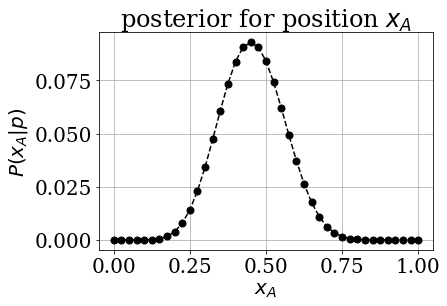

In [11]:
# Compute posterior. ----------------------------------------

P=np.zeros(len(x_A))

P=float(special.binom(N,p))*np.power(x_A,p)*np.power(1.0-x_A,N-p)*dx
P=P/np.sum(P)

# Visualisation. --------------------------------------------

plt.plot(x_A,P,'ko',markersize=7)
plt.plot(x_A,P,'k--',linewidth=1.5)
plt.grid()
plt.xlabel(r'$x_A$')
plt.ylabel(r'$P(x_A|p)$')
plt.title('posterior for position $x_A$')

plt.show()

# 3. Predictions of future observations

What apparently fascinated Price and Bayes most is the ability to make quantitative predictions of future events. Indeed, the probability of observing $L$ given that is has been observed $p$ times before, is
\begin{equation}
P(L | p) = \sum_{x_A} k\, \begin{pmatrix} N \\ p \end{pmatrix} \left( \frac{x_A}{l_x} \right)^{p+1} \left( 1 - \frac{x_A}{l_x} \right)^{N-p}\, \frac{\Delta x}{l_x}\,.
\end{equation}
We compute and visualise this probability distribution below.

In [12]:
# Compute posterior marginal. -------------------------------

P=np.zeros(len(x_A))
PL=np.zeros(N+1)

for p in range(N+1):

    P=float(special.binom(N,p))*np.power(x_A,p)*np.power(1.0-x_A,N-p)*dx
    P=P/np.sum(P)
    P=P*x_A
    PL[p]=sum(P)

# Visualisation. --------------------------------------------
    
plt.plot(range(N+1),PL,'ko',markersize=7)
plt.plot(range(N+1),PL,'k--',linewidth=1.5)
plt.grid()
plt.ylim((0.0,1.0))
plt.xlabel(r'$p$')
plt.ylabel(r'$P(L|p)$')

plt.tight_layout()

plt.savefig('N20.pdf',format='pdf')
plt.close()

#plt.show()
